In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn

In [2]:
print("Pandas version:", pd.__version__)
print("Seaborn version:", sns.__version__)
print("Scikit-learn version:", sklearn.__version__)

Pandas version: 2.0.3
Seaborn version: 0.13.2
Scikit-learn version: 1.3.2


In [3]:
# importar database dados clientes
# import database dados clientes
dados_clientes = pd.read_csv(r'./datasets/dados_clientes_financeira.csv', sep = ';', encoding='latin-1')
dados_clientes

,ID_cliente,genero,escolaridade,idade,estado_civil,cod_estado
0,1,Masculino,Graduação,65.0,Viúvo,10
1,2,Masculino,Pós-graduação,39.0,Casado,5
2,3,Feminino,Pós-graduação,39.0,Divorciado,27
3,4,Feminino,Ensino Médio,36.0,Solteiro,9
4,5,Masculino,Ensino Médio,57.0,Solteiro,18
...,...,...,...,...,...,...
1004,996,Feminino,Pós-graduação,50.0,Viúvo,9
1005,997,Masculino,Graduação,25.0,Viúvo,4
1006,998,Masculino,Ensino Médio,41.0,Casado,23
1007,999,Feminino,Pós-graduação,34.0,Casado,20


In [4]:
# checar database dados clientes
# info from dados clientes
dados_clientes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1009 entries, 0 to 1008
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   ID_cliente    1009 non-null   int64  
 1   genero        1009 non-null   object 
 2   escolaridade  1004 non-null   object 
 3   idade         994 non-null    float64
 4   estado_civil  1009 non-null   object 
 5   cod_estado    1009 non-null   int64  
dtypes: float64(1), int64(2), object(3)
memory usage: 47.4+ KB


In [5]:
# checar dados nan da dados clientes
# check null values dados clientes
dados_clientes.isnull().sum()

ID_cliente       0
genero           0
escolaridade     5
idade           15
estado_civil     0
cod_estado       0
dtype: int64

In [6]:
# checar se dados de clientes tem dados duplicados
# check duplicated values dados clientes
dados_clientes.duplicated().sum()

9

In [7]:
# substituição dos dados null na coluna escolaridade pela moda
# achar a moda
# replace null values from escolaridade with the mode from this column
moda_escolaridade = dados_clientes['escolaridade'].mode()[0]
# substituir os valores nulos
dados_clientes['escolaridade'] = dados_clientes['escolaridade'].fillna(moda_escolaridade)

In [8]:
# correção das idades nulas aplicando a média pelo gênero
# Calcular a média de idade para cada gênero
# Correcting the null ages by applying the average by gender
# Calculate the average age for each gender
mediaM = dados_clientes.loc[dados_clientes['genero'] == 'Masculino', 'idade'].mean().round()
mediaF = dados_clientes.loc[dados_clientes['genero'] == 'Feminino', 'idade'].mean().round()

# Preencher os valores nulos na coluna 'idade' para cada gênero
# Fill in the null values in the 'age' column for each gender
dados_clientes.loc[(dados_clientes['genero'] == 'Masculino') & (dados_clientes['idade'].isnull()), 'idade'] = mediaM
dados_clientes.loc[(dados_clientes['genero'] == 'Feminino') & (dados_clientes['idade'].isnull()), 'idade'] = mediaF

In [9]:
# eliminar dados duplicados
# remove duplicated data
dados_clientes = dados_clientes.drop_duplicates()

In [10]:
# checar dados nan da dados clientes após as correções
# check data infor after the corrections
dados_clientes.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1000 entries, 0 to 1008
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   ID_cliente    1000 non-null   int64  
 1   genero        1000 non-null   object 
 2   escolaridade  1000 non-null   object 
 3   idade         1000 non-null   float64
 4   estado_civil  1000 non-null   object 
 5   cod_estado    1000 non-null   int64  
dtypes: float64(1), int64(2), object(3)
memory usage: 54.7+ KB


In [11]:
# importar database investimento clientes
# import database investimento clientes
investimentos_clientes = pd.read_csv(r'./datasets/investimentos_clientes.csv', sep = '|', encoding='latin-1')
investimentos_clientes

,ID_cliente,tipo_transacao_mais_frequente,tolerancia_risco,valor_investido,valor_investido_acoes,valor_investido_fii,valor_investido_dolar,valor_investido_renda_fixa,perfil
0,1,Investimentos,Baixa,971843,47473,581110,196765,146495,Conservador
1,2,Transferências,Moderado,20594,5369,4009,6662,4554,Moderado
2,3,Investimentos,Moderado,617958,440851,63165,25113,88829,Arrojado
3,4,Pagamentos,Alta,893161,621503,169623,2145,99890,Arrojado
4,5,Transferências,Moderado,98889,29075,34819,18493,16502,Conservador
...,...,...,...,...,...,...,...,...,...
1013,996,Investimentos,Alta,670109,161442,431969,27405,49293,Arrojado
1014,997,Investimentos,Moderado,596403,472022,101959,12610,9812,Arrojado
1015,998,Transferências,Alta,568498,112216,404784,18790,32708,Arrojado
1016,999,Investimentos,Alta,595688,359567,77974,112462,45685,Arrojado


In [12]:
# checar database investimentos clientes
# check the database investimentos clientes
investimentos_clientes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1018 entries, 0 to 1017
Data columns (total 9 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   ID_cliente                     1018 non-null   int64 
 1   tipo_transacao_mais_frequente  1018 non-null   object
 2   tolerancia_risco               1018 non-null   object
 3   valor_investido                1018 non-null   int64 
 4   valor_investido_acoes          1018 non-null   int64 
 5   valor_investido_fii            1018 non-null   int64 
 6   valor_investido_dolar          1018 non-null   int64 
 7   valor_investido_renda_fixa     1018 non-null   int64 
 8   perfil                         1018 non-null   object
dtypes: int64(6), object(3)
memory usage: 71.7+ KB


In [13]:
# checar se investimentos clientes tem dados duplicados
# checck if investimentos clientes has duplicated data
investimentos_clientes.duplicated().sum()

18

In [14]:
# remoção dos dados duplicados de investimentos clientes
# remove duplicated data
investimentos_clientes = investimentos_clientes.drop_duplicates()
investimentos_clientes.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1000 entries, 0 to 1017
Data columns (total 9 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   ID_cliente                     1000 non-null   int64 
 1   tipo_transacao_mais_frequente  1000 non-null   object
 2   tolerancia_risco               1000 non-null   object
 3   valor_investido                1000 non-null   int64 
 4   valor_investido_acoes          1000 non-null   int64 
 5   valor_investido_fii            1000 non-null   int64 
 6   valor_investido_dolar          1000 non-null   int64 
 7   valor_investido_renda_fixa     1000 non-null   int64 
 8   perfil                         1000 non-null   object
dtypes: int64(6), object(3)
memory usage: 78.1+ KB


In [15]:
# importar database estado
# import database estado
estado_regiao = pd.read_csv(r'./datasets/estado_regiao.csv', sep = ';', encoding='latin-1')
estado_regiao

,id_estado,sigla,estado,regiao,pais
0,1,AC,Acre,Norte,Brasil
1,2,AL,Alagoas,Nordeste,Brasil
2,3,AP,Amapá,Norte,Brasil
3,4,AM,Amazonas,Norte,Brasil
4,5,BA,Bahia,Nordeste,Brasil
5,6,CE,Ceará,Nordeste,Brasil
6,7,DF,Distrito Federal,Centro-Oeste,Brasil
7,8,ES,Espírito Santo,Sudeste,Brasil
8,9,GO,Goiás,Centro-Oeste,Brasil
9,10,MA,Maranhão,Nordeste,Brasil


In [16]:
# checar database estados
# check the database estados
estado_regiao.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27 entries, 0 to 26
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   id_estado  27 non-null     int64 
 1   sigla      27 non-null     object
 2   estado     27 non-null     object
 3   regiao     27 non-null     object
 4   pais       27 non-null     object
dtypes: int64(1), object(4)
memory usage: 1.2+ KB


In [17]:
# checar database estados para valores duplicados
# check duplicated values for database estados
estado_regiao.duplicated().sum()

0

In [18]:
# merge database clientes
# merge dataframes 'investimentos_clientes' e 'dados_clientes'
df_merge = pd.merge(investimentos_clientes, dados_clientes, on='ID_cliente', how='inner')

# Em seguida, fazemos o merge do resultado com 'estado_regiao'
# merge df_merge with estado_regiao
df_final = pd.merge(df_merge, estado_regiao, left_on='cod_estado', right_on='id_estado', how='inner').sort_values('ID_cliente')


In [19]:
df_final

,ID_cliente,tipo_transacao_mais_frequente,tolerancia_risco,valor_investido,valor_investido_acoes,valor_investido_fii,valor_investido_dolar,valor_investido_renda_fixa,perfil,genero,escolaridade,idade,estado_civil,cod_estado,id_estado,sigla,estado,regiao,pais
0,1,Investimentos,Baixa,971843,47473,581110,196765,146495,Conservador,Masculino,Graduação,65.0,Viúvo,10,10,MA,Maranhão,Nordeste,Brasil
35,2,Transferências,Moderado,20594,5369,4009,6662,4554,Moderado,Masculino,Pós-graduação,39.0,Casado,5,5,BA,Bahia,Nordeste,Brasil
81,3,Investimentos,Moderado,617958,440851,63165,25113,88829,Arrojado,Feminino,Pós-graduação,39.0,Divorciado,27,27,TO,Tocantins,Norte,Brasil
115,4,Pagamentos,Alta,893161,621503,169623,2145,99890,Arrojado,Feminino,Ensino Médio,36.0,Solteiro,9,9,GO,Goiás,Centro-Oeste,Brasil
157,5,Transferências,Moderado,98889,29075,34819,18493,16502,Conservador,Masculino,Ensino Médio,57.0,Solteiro,18,18,PI,Piauí,Nordeste,Brasil
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
156,996,Investimentos,Alta,670109,161442,431969,27405,49293,Arrojado,Feminino,Pós-graduação,50.0,Viúvo,9,9,GO,Goiás,Centro-Oeste,Brasil
828,997,Investimentos,Moderado,596403,472022,101959,12610,9812,Arrojado,Masculino,Graduação,25.0,Viúvo,4,4,AM,Amazonas,Norte,Brasil
499,998,Transferências,Alta,568498,112216,404784,18790,32708,Arrojado,Masculino,Ensino Médio,41.0,Casado,23,23,RR,Roraima,Norte,Brasil
610,999,Investimentos,Alta,595688,359567,77974,112462,45685,Arrojado,Feminino,Pós-graduação,34.0,Casado,20,20,RN,Rio Grande do Norte,Nordeste,Brasil


In [20]:
# what is the standard deviation from the client's age?
# qual é o desvio padrão das idades dos clientes?
df_final['idade'].std()

15.315456055703793

In [21]:
# Qual região do país obteve maior média de valores investidos?
# Which country region had the highest average amount invested?
df_final.groupby('regiao')['valor_investido'].mean().sort_values(ascending=False)

regiao
Sudeste         532009.920290
Centro-Oeste    520475.780000
Norte           490552.965649
Nordeste        486925.116766
Sul             477496.594828
Name: valor_investido, dtype: float64

In [22]:
# Considerando os valores investidos em diferentes categorias, 
# qual tipo de investimento apresenta o maior valor agregado em toda a base de clientes?
# Considering the amounts invested in different categories, 
# which type of investment has the highest added value across the entire customer base?

# Calcular a soma de cada tipo de investimento
# sum the different categories
soma_acoes = df_final['valor_investido_acoes'].sum()
soma_fii = df_final['valor_investido_fii'].sum()
soma_dolar = df_final['valor_investido_dolar'].sum()
soma_renda_fixa = df_final['valor_investido_renda_fixa'].sum()

# A função format é usada para formatar a variável soma_acoes. 
# O segundo argumento, ',', instrui a função a inserir uma vírgula a cada três dígitos, contando da direita para a esquerda.
print('investimento acoes: ' + format(soma_acoes, ',').replace(',', '.'))
print('investimento fii: ' + format(soma_fii, ',').replace(',', '.'))
print('investimento dolar: ' + format(soma_dolar, ',').replace(',', '.'))
print('investimento renda_fixa: ' + format(soma_renda_fixa, ',').replace(',', '.'))

investimento acoes: 241.009.996
investimento fii: 125.269.026
investimento dolar: 66.010.539
investimento renda_fixa: 65.746.646


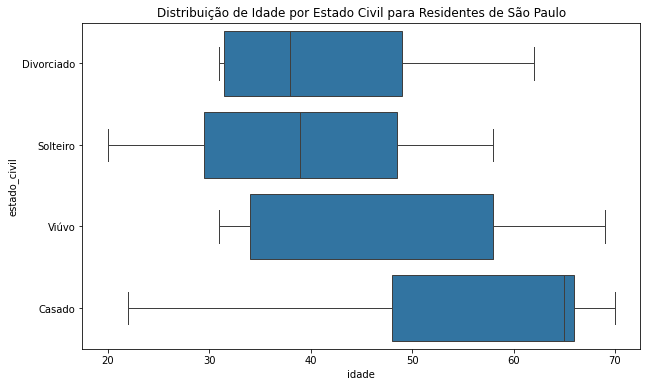

In [23]:
# Elabore um gráfico de boxplot que represente a distribuição das idades dos clientes do gênero masculino 
# residentes em São Paulo, classificados de acordo com seu estado civil.
# Draw up a boxplot representing the age distribution of male customers 
# living in São Paulo, classified according to their marital status.

#criar dataframe com SP
# create SP dataframe
residentes_sp = df_final[(df_final['estado'] == 'São Paulo') & (df_final['genero'] == 'Masculino')]

# boxplot
plt.figure(figsize=(10,6))
sns.boxplot(x=residentes_sp['idade'], y=residentes_sp['estado_civil'])
plt.title('Distribuição de Idade por Estado Civil para Residentes de São Paulo')
plt.show()

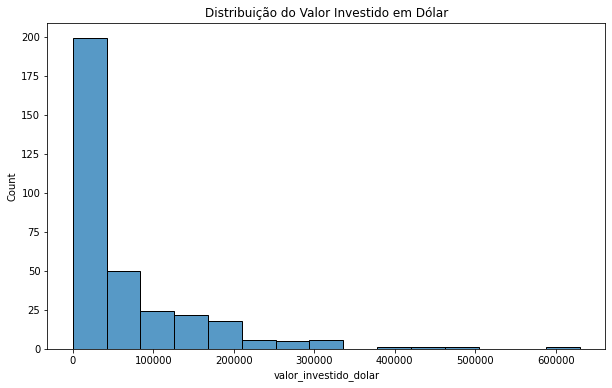

In [24]:
# Construa um histograma que ilustre a distribuição dos valores investidos em dólar por clientes da região Nordeste. 
# Configure o gráfico com 15 barras para proporcionar uma representação visual detalhada.
# Build a histogram that illustrates the distribution of the dollar amounts invested by clients in the Northeast region. 
# Configure the graph with 15 bars to provide a detailed visual representation.

residentes_ne = df_final[df_final['regiao'] == 'Nordeste']

plt.figure(figsize=(10,6))
sns.histplot(x=residentes_ne['valor_investido_dolar'], bins=15)
plt.title('Distribuição do Valor Investido em Dólar')
plt.show()

In [25]:
# Imblearn é uma bilbioteca utilizanda para tratar dados desbalanceados
# Imblearn is a library used to process unbalanced data
from imblearn.under_sampling import RandomUnderSampler, TomekLinks

In [26]:
# transformando dados categóricos em numéricos
# transforming categorical data into numerical
from sklearn.preprocessing import LabelEncoder

# removendo dados categóricos que não serão utilizados
# removing categorical data that will not be used
df_randomForest = df_final.drop(['ID_cliente','tipo_transacao_mais_frequente','tolerancia_risco', 
                                 'cod_estado','id_estado','sigla', 'estado', 'pais'], axis=1)

# criando um identificador numérico para cada uma das variáveis
# creating a numeric identifier for each of the variables
LE = LabelEncoder()

# criando novas colunas com os id numéricos
# creating new columns with the numeric ids
colunas_selecionadas = ['genero', 'escolaridade', 'estado_civil', 'regiao' ]
for coluna in colunas_selecionadas:
    df_randomForest[f'id_{coluna}'] = LE.fit_transform(df_randomForest[coluna])

df_randomForest

,valor_investido,valor_investido_acoes,valor_investido_fii,valor_investido_dolar,valor_investido_renda_fixa,perfil,genero,escolaridade,idade,estado_civil,regiao,id_genero,id_escolaridade,id_estado_civil,id_regiao
0,971843,47473,581110,196765,146495,Conservador,Masculino,Graduação,65.0,Viúvo,Nordeste,1,1,3,1
35,20594,5369,4009,6662,4554,Moderado,Masculino,Pós-graduação,39.0,Casado,Nordeste,1,2,0,1
81,617958,440851,63165,25113,88829,Arrojado,Feminino,Pós-graduação,39.0,Divorciado,Norte,0,2,1,2
115,893161,621503,169623,2145,99890,Arrojado,Feminino,Ensino Médio,36.0,Solteiro,Centro-Oeste,0,0,2,0
157,98889,29075,34819,18493,16502,Conservador,Masculino,Ensino Médio,57.0,Solteiro,Nordeste,1,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
156,670109,161442,431969,27405,49293,Arrojado,Feminino,Pós-graduação,50.0,Viúvo,Centro-Oeste,0,2,3,0
828,596403,472022,101959,12610,9812,Arrojado,Masculino,Graduação,25.0,Viúvo,Norte,1,1,3,2
499,568498,112216,404784,18790,32708,Arrojado,Masculino,Ensino Médio,41.0,Casado,Norte,1,0,0,2
610,595688,359567,77974,112462,45685,Arrojado,Feminino,Pós-graduação,34.0,Casado,Nordeste,0,2,0,1


In [27]:
# removendo dados categóricos que foram transformados em numericos
# removing categorical data that were transformed in numerical
df_randomForest = df_randomForest.drop(['genero', 'escolaridade', 'estado_civil', 'regiao' ], axis=1)
df_randomForest

,valor_investido,valor_investido_acoes,valor_investido_fii,valor_investido_dolar,valor_investido_renda_fixa,perfil,idade,id_genero,id_escolaridade,id_estado_civil,id_regiao
0,971843,47473,581110,196765,146495,Conservador,65.0,1,1,3,1
35,20594,5369,4009,6662,4554,Moderado,39.0,1,2,0,1
81,617958,440851,63165,25113,88829,Arrojado,39.0,0,2,1,2
115,893161,621503,169623,2145,99890,Arrojado,36.0,0,0,2,0
157,98889,29075,34819,18493,16502,Conservador,57.0,1,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...
156,670109,161442,431969,27405,49293,Arrojado,50.0,0,2,3,0
828,596403,472022,101959,12610,9812,Arrojado,25.0,1,1,3,2
499,568498,112216,404784,18790,32708,Arrojado,41.0,1,0,0,2
610,595688,359567,77974,112462,45685,Arrojado,34.0,0,2,0,1


In [28]:
# Separando conjunto de dados de features e target
# Separating feature and target datasets

X_dados = df_randomForest.drop('perfil', axis=1).values
y_dados = df_randomForest['perfil'].values

In [29]:
# Criando função para balancear os dados
# Creating a function to balance the data

# O undersampling visa equilibrar a distribuição da classe, removendo exemplos da classe majoritária
def balanceamento_dados(X_dados, y_dados):
    # O parâmetro random_state é usado para garantir que a seleção aleatória de exemplos seja reproduzível.
    undersample = RandomUnderSampler(random_state = 42)
    X_under, y_under = undersample.fit_resample(X_dados, y_dados)
    
    tl = TomekLinks(sampling_strategy='all') 
    X_under, y_under  = tl.fit_resample(X_under, y_under)
    return X_under, y_under

In [30]:
# Aplicando técnica de balanceamento na base de dados
# Applying balancing techniques to the database
X_dados_balanceados, y_dados_balanceados = balanceamento_dados(X_dados, y_dados)

In [31]:
# Verificando balanceamento realizado
# Checking the balance
print(len(X_dados_balanceados), len(y_dados_balanceados))

704 704


In [32]:
# Criando função para realizar separação entre o conjunto de treinamento e teste
# Creating a function to separate the training and test sets
from sklearn.model_selection import train_test_split

def separa_treino_teste(X_dados_balanceados, y_dados_balanceados):
    X_train, X_test, y_train, y_test = train_test_split(X_dados_balanceados, y_dados_balanceados, 
                                                        random_state=42, test_size =0.2)
    return X_train, X_test, y_train, y_test

# Separando conjuntos de treino e teste 
# Separating training and test sets
X_train, X_test, y_train, y_test = separa_treino_teste(X_dados_balanceados, y_dados_balanceados)

In [33]:
# Após a aplicação do algoritmo RandomForestClassifier, 
# qual feature demonstra a maior importância no contexto dos dados analisados?
# After applying the RandomForestClassifier algorithm, 
# which feature shows the greatest importance in the context of the analyzed data?

from sklearn.ensemble import RandomForestClassifier

# criar o classificador de Random Forest
# create the Random Forest classifier
'''n_estimators=100: Este parâmetro define o número de árvores de decisão a serem criadas na floresta aleatória. 
   Mais árvores geralmente levam a melhor precisão, mas também aumentam o tempo de treinamento.
   Este parâmetro define a profundidade máxima de cada árvore de decisão. 
   Uma árvore de decisão mais profunda pode ser mais precisa, mas também é mais propensa a sobreajuste.'''
classifier = RandomForestClassifier(random_state=42,n_estimators=100, max_depth=100)

# criar modelo de classificação
# create classification model
modelo = classifier.fit(X_train, y_train)

# Realiza predições
# Make predictions
y_pred = modelo.predict(X_test)


In [34]:
pd.DataFrame(modelo.feature_importances_, columns=['importancia'],
            index = ['valor_investido', 'valor_investido_acoes', 'valor_investido_fii', 'valor_investido_dolar',
                     'valor_investido_renda_fixa', 'idade', 'id_genero', 'id_escolaridade', 'id_estado_civil',
                     'id_regiao']).sort_values('importancia', ascending=False)

,importancia
valor_investido_renda_fixa,0.220060
valor_investido_acoes,0.216976
valor_investido_dolar,0.167158
valor_investido_fii,0.152620
valor_investido,0.110946
idade,0.052612
id_regiao,0.029183
id_estado_civil,0.021242
id_escolaridade,0.017836
id_genero,0.011366


In [35]:
# Gere a pontuação (score) do modelo criado.
# Generate the score of the model created.
from sklearn.metrics import accuracy_score

acuracia = accuracy_score(y_test, y_pred)
print('Precisão: ', acuracia)

Precisão:  0.8652482269503546


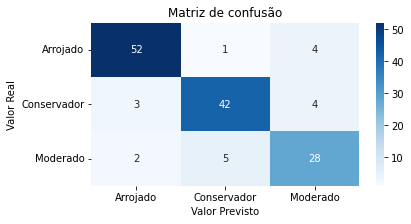

In [36]:
# Matriz de confusão
# Confusion Matrix
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred)

# Definir os rótulos para os eixos, coloca-los em ordem alfabética
# Define the labels for the axes
labels = ['Arrojado', 'Conservador', 'Moderado']

plt.figure(figsize=(6,3))
sns.heatmap(data=cm,
            annot = True,
            cmap = 'Blues',
            xticklabels = labels,
            yticklabels = labels
)

plt.xlabel('Valor Previsto')
plt.ylabel('Valor Real')
plt.title('Matriz de confusão')
plt.show()

In [37]:
# relatório de classificação
# classification report
from sklearn.metrics import classification_report

report = classification_report(y_test, y_pred)
print(report)

              precision    recall  f1-score   support

    Arrojado       0.91      0.91      0.91        57
 Conservador       0.88      0.86      0.87        49
    Moderado       0.78      0.80      0.79        35

    accuracy                           0.87       141
   macro avg       0.86      0.86      0.86       141
weighted avg       0.87      0.87      0.87       141

